# Fifa Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
print("Imported!")

Imported!


In [2]:
df=pd.read_csv('players_21.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [3]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penal

In [4]:
df.shape

(18944, 106)

In [5]:
df['nationality'].value_counts()

England                     1685
Germany                     1189
Spain                       1072
France                       984
Argentina                    936
Brazil                       887
Japan                        489
Netherlands                  432
Italy                        421
United States                378
Sweden                       372
China PR                     364
Norway                       363
Mexico                       362
Poland                       360
Portugal                     353
Uruguay                      349
Turkey                       344
Korea Republic               341
Republic of Ireland          338
Colombia                     338
Romania                      324
Austria                      321
Saudi Arabia                 317
Denmark                      300
Belgium                      298
Scotland                     287
Ecuador                      252
Australia                    241
Paraguay                     235
Switzerlan

In [6]:
df['nationality'].value_counts()[0:10]

England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
Brazil            887
Japan             489
Netherlands       432
Italy             421
United States     378
Name: nationality, dtype: int64

##  1.Players Nationality

In [7]:
df['nationality'].value_counts()[0:5]

England      1685
Germany      1189
Spain        1072
France        984
Argentina     936
Name: nationality, dtype: int64

In [8]:
df['nationality'].value_counts()[0:5].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

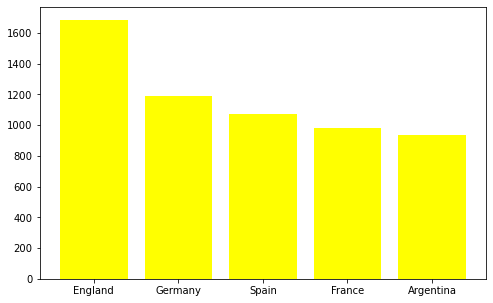

In [9]:
plt.figure(figsize=(8,5))
plt.bar(list(df['nationality'].value_counts()[0:5].keys()),list(df['nationality'].value_counts()[0:5]),color='yellow')
plt.show()

In [10]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

## Replacing Null value with Mean Value

In [11]:
remove_null=df.loc[:,['dribbling','defending','passing','pace','shooting','physic']]

for col in remove_null.columns:
    df[col].fillna(df[col].mean(),inplace=True)

In [12]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

## 2.Player Salary

In [13]:
player_salary=df[['short_name','wage_eur','club_name']]

In [14]:
player_salary.head()

,short_name,wage_eur,club_name
0,L. Messi,560000,FC Barcelona
1,Cristiano Ronaldo,220000,Juventus
2,J. Oblak,125000,Atlético Madrid
3,R. Lewandowski,240000,FC Bayern München
4,Neymar Jr,270000,Paris Saint-Germain


In [15]:
player_salary=player_salary.sort_values(by=['wage_eur'],ascending=False)

In [16]:
player_salary1=player_salary.head(10)
player_salary1.head()

,short_name,wage_eur,club_name
0,L. Messi,560000,FC Barcelona
5,K. De Bruyne,370000,Manchester City
15,K. Benzema,350000,Real Madrid
25,E. Hazard,350000,Real Madrid
24,T. Kroos,310000,Real Madrid


Text(0.5, 0, 'Player Name')

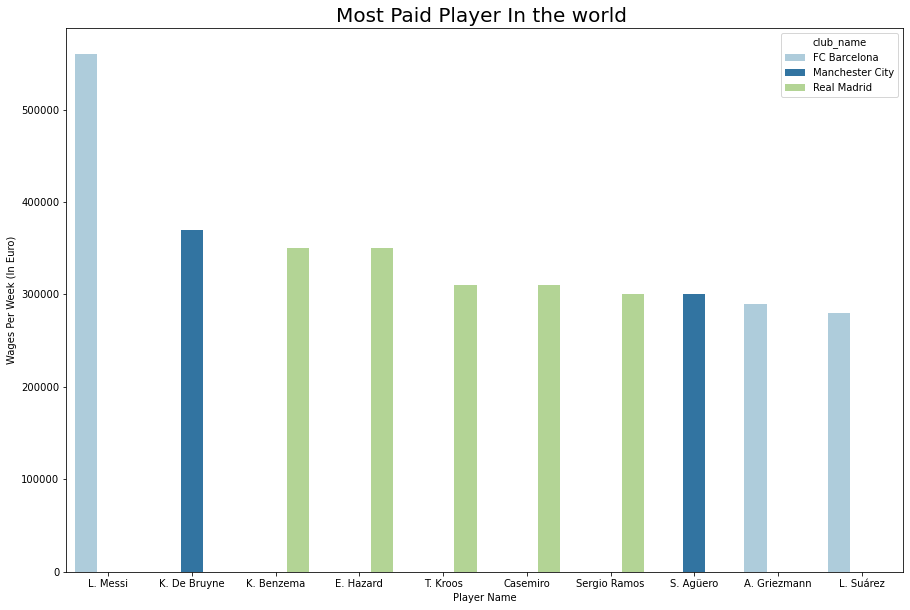

In [17]:
plt.figure(figsize=(15,10))
plt.title("Most Paid Player In the world ",fontsize=20)
sns.barplot(data=player_salary1,x="short_name",y="wage_eur",hue="club_name",palette="Paired")
plt.ylabel("Wages Per Week (In Euro)")
plt.xlabel("Player Name")


## 3.League Leaders of Different League

In [18]:
league_leaders=df[['club_name','league_rank','league_name']]

In [19]:
league_leaders=league_leaders.head(10)

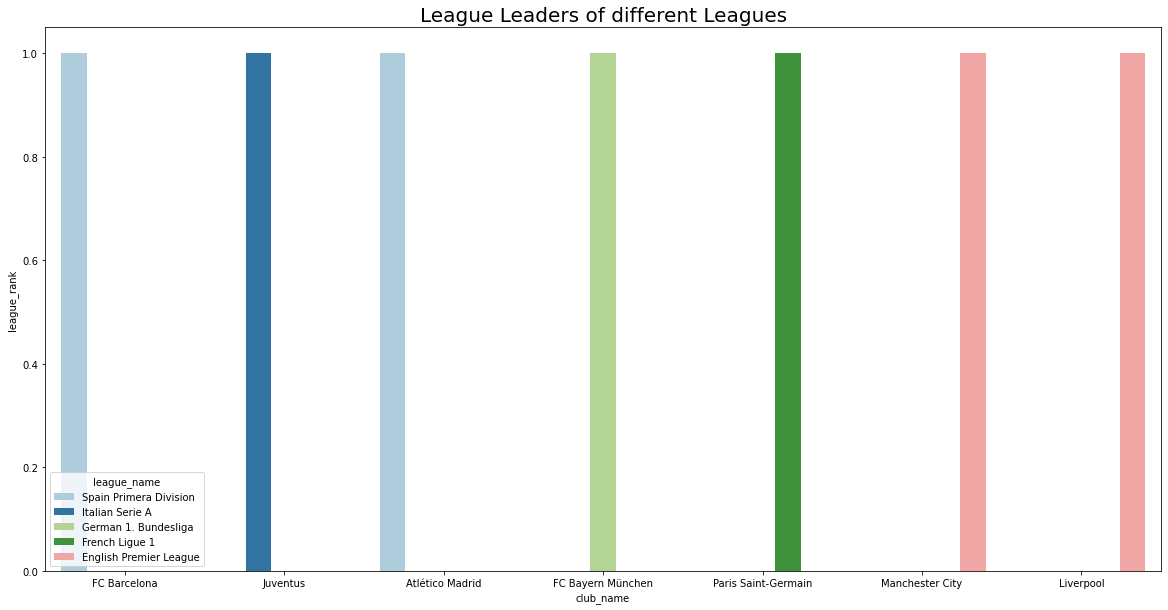

In [20]:
plt.figure(figsize=(20,10))
plt.title("League Leaders of different Leagues",fontsize=20)
sns.barplot(data=league_leaders,x="club_name",y="league_rank",hue="league_name",palette="Paired")
plt.show()

## 4.Richest Clubs in the World

In [21]:
rich_clubs=df[['club_name','value_eur','league_name']]

In [22]:
rich_clubs=rich_clubs.head(10)

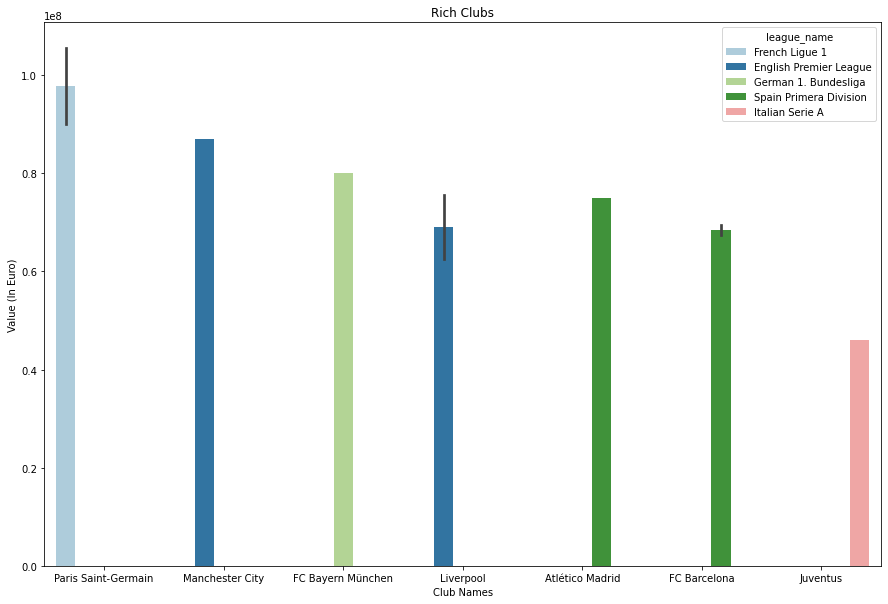

In [23]:
plt.figure(figsize=(15,10))
plt.title("Rich Clubs")
sns.barplot(x="club_name",y="value_eur",hue='league_name',palette="Paired",data=rich_clubs.sort_values(by=['value_eur'],ascending=False))
plt.ylabel("Value (In Euro)")
plt.xlabel("Club Names")
plt.show()

# Manchester United

In [24]:
man_utd=df[df['club_name']=='Manchester United']

In [25]:
man_utd.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
30,212198,https://sofifa.com/player/212198/bruno-miguel-...,Bruno Fernandes,Bruno Miguel Borges Fernandes,25,1994-09-08,179,69,Portugal,Manchester United,English Premier League,1.0,87,90,63000000,195000,"CAM, CM",Right,2,4,4,High/High,Lean,Yes,124400000.0,"#Playmaker, #Engine, #Distance Shooter, #Cross...",CAM,18.0,NaN,2020-01-30,2025.0,RCM,16.0,77.00000,83.000000,88.000000,85.00000,68.000000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Flair, Long Passer (AI), Long Sh...",87,77,58,88,86,85,86,87,87,88,78,76,79,86,79,89,72,94,67,89,70,74,83,90,91,86,NaN,67,55,12,14,15,8,14,80+2,80+2,80+2,84+0,84+0,84+0,84+0,84+0,86+2,86+2,86+2,85+2,86+2,86+2,86+2,85+2,79+2,79+2,79+2,79+2,79+2,76+2,70+2,70+2,70+2,76+2
49,195864,https://sofifa.com/player/195864/paul-pogba/21...,P. Pogba,Paul Pogba,27,1993-03-15,191,84,France,Manchester United,English Premier League,1.0,86,87,50000000,190000,"CM, CDM",Right,4,4,5,High/Medium,PLAYER_BODY_TYPE_330,Yes,98800000.0,"#Dribbler, #Playmaker, #Strength, #Complete Mi...",RDM,6.0,NaN,2016-08-09,2021.0,NaN,NaN,73.00000,81.000000,86.000000,85.00000,66.000000,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Long Passer (AI), Long Shot Taker (AI),...",80,75,75,86,84,87,85,82,91,90,66,79,73,81,66,90,82,83,89,82,78,64,81,88,83,87,NaN,67,65,5,6,2,4,3,82+3,82+3,82+3,82+0,83+0,83+0,83+0,82+0,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,78+3,78+3,78+3,76+3,74+3,73+3,73+3,73+3,74+3
59,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,29,1990-11-07,192,82,Spain,Manchester United,English Premier League,1.0,86,86,31500000,150000,GK,Right,4,3,1,Medium/Medium,PLAYER_BODY_TYPE_329,Yes,59900000.0,NaN,GK,1.0,NaN,2011-07-01,2023.0,GK,1.0,67.66811,52.274954,57.139434,62.45543,51.316292,64.458988,88.0,81.0,78.0,89.0,58.0,82.0,"Solid Player, GK Long Throw, Cautious With Cro...",17,13,21,50,13,18,21,19,47,38,57,58,63,83,43,59,67,43,60,12,38,30,12,61,29,65,NaN,21,13,88,81,78,82,89,35+3,35+3,35+3,36+0,38+0,38+0,38+0,36+0,41+3,41+3,41+3,39+3,42+3,42+3,42+3,39+3,36+3,40+3,40+3,40+3,36+3,35+3,34+3,34+3,34+3,35+3
65,231677,https://sofifa.com/player/231677/marcus-rashfo...,M. Rashford,Marcus Rashford,22,1997-10-31,186,70,England,Manchester United,English Premier League,1.0,85,91,53000000,150000,"LM, ST",Right,2,4,5,High/Medium,PLAYER_BODY_TYPE_327,Yes,111300000.0,"#Speedster, #Dribbler, #Acrobat",LM,10.0,NaN,2014-07-01,2023.0,SUB,10.0,91.00000,83.000000,78.000000,86.00000,45.000000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",77,83,68,81,73,87,82,76,69,85,89,93,86,86,75,90,72,87,76,81,73,42,82,82,81,82,NaN,40,33,11,6,15,7,14,83+2,83+2,83+2,84+0,85+0,85+0,85+0,84+0,83+2,83+2,83+2,84+2,77+2,77+2,77+2,8

In [26]:
best_player=man_utd[['short_name','overall']]

In [27]:
best_player.sort_values(by=['overall'],ascending=False)

,short_name,overall
30,Bruno Fernandes,87
49,P. Pogba,86
59,De Gea,86
65,M. Rashford,85
106,A. Martial,84
149,A. Wan-Bissaka,83
153,D. van de Beek,83
222,H. Maguire,82
307,L. Shaw,81
308,Fred,81


In [28]:
best_player=best_player.head(10)

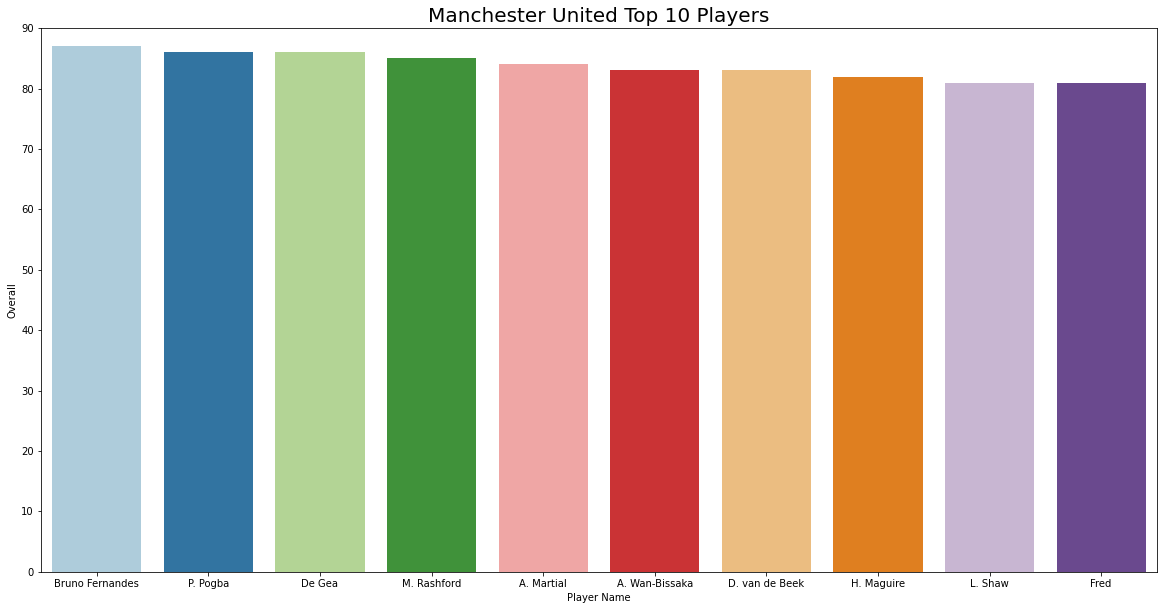

In [29]:
plt.figure(figsize=(20,10))
plt.title("Manchester United Top 10 Players",fontsize=20)
sns.barplot(data=best_player,x="short_name",y="overall",palette="Paired")
plt.ylim(0,90)
plt.ylabel("Overall")
plt.xlabel("Player Name")
plt.show()

In [30]:
man_wage=man_utd[['short_name','wage_eur']]

In [31]:
man_wage

,short_name,wage_eur
30,Bruno Fernandes,195000
49,P. Pogba,190000
59,De Gea,150000
65,M. Rashford,150000
106,A. Martial,155000
149,A. Wan-Bissaka,115000
153,D. van de Beek,125000
222,H. Maguire,120000
307,L. Shaw,97000
308,Fred,115000


In [32]:
man_wage=man_wage.sort_values(by=['wage_eur'],ascending=False).head(10)

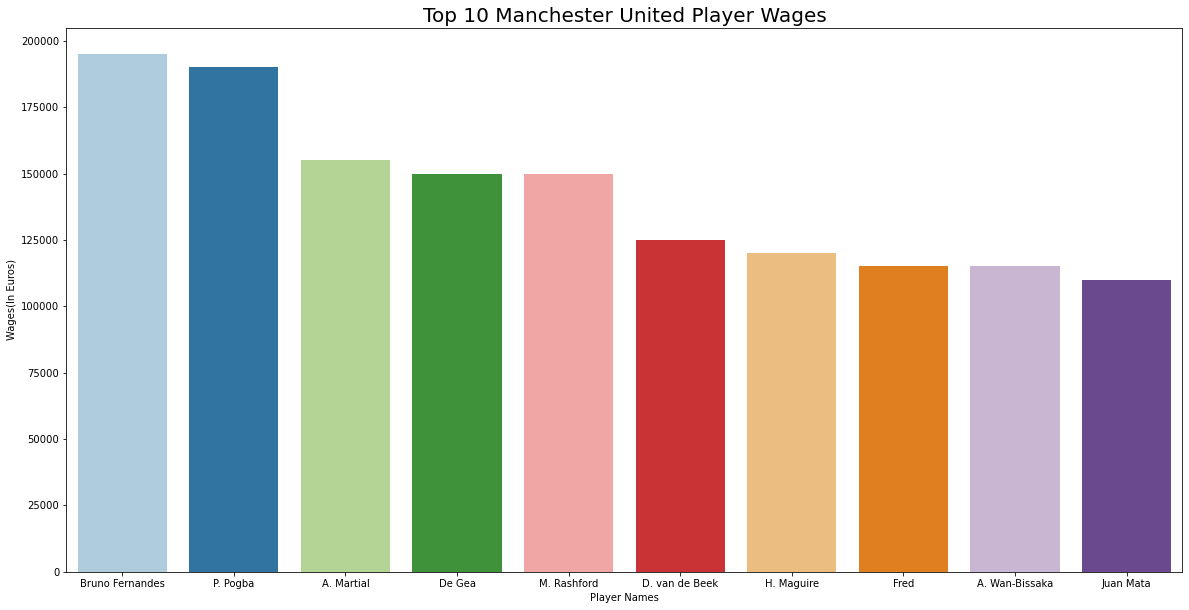

In [33]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Manchester United Player Wages",fontsize=20)
sns.barplot(data=man_wage,x="short_name",y="wage_eur",palette="Paired")
plt.ylabel("Wages(In Euros)")
plt.xlabel("Player Names")
plt.show()

   ## Contract Valid Until

In [34]:
con_valid=man_utd[['short_name','contract_valid_until']]

In [35]:
con_valid.sort_values(by=['contract_valid_until'],ascending=False)

,short_name,contract_valid_until
30,Bruno Fernandes,2025.0
536,S. McTominay,2025.0
153,D. van de Beek,2025.0
370,D. Henderson,2025.0
1521,B. Williams,2024.0
106,A. Martial,2024.0
149,A. Wan-Bissaka,2024.0
222,H. Maguire,2024.0
933,D. James,2024.0
395,V. Lindelöf,2024.0


In [36]:
con_valid=con_valid.head(10)

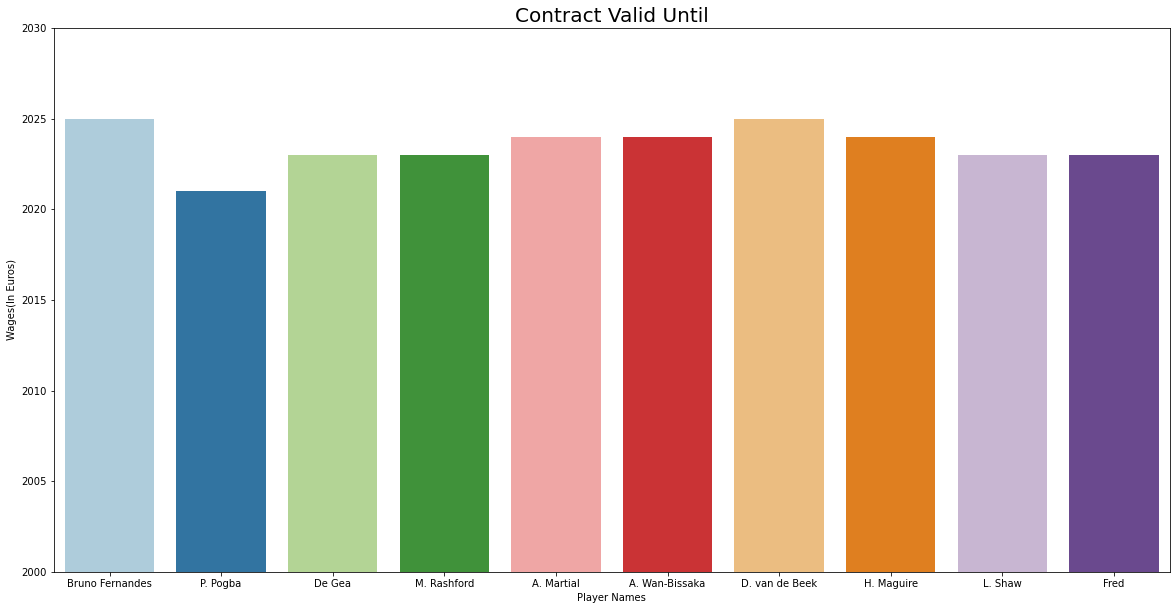

In [37]:
plt.figure(figsize=(20,10))
plt.title("Contract Valid Until",fontsize=20)
sns.barplot(data=con_valid,x="short_name",y="contract_valid_until",palette="Paired")
plt.ylabel("Wages(In Euros)")
plt.xlabel("Player Names")
plt.ylim(2000,2030)
plt.show()

## Best Passing Skills

In [38]:
best_pass=man_utd[['short_name','passing']]

In [39]:
best_pass=best_pass.sort_values(by=['passing'],ascending=False).head(10)
best_pass

,short_name,passing
30,Bruno Fernandes,88.0
49,P. Pogba,86.0
610,Juan Mata,82.0
308,Fred,79.0
65,M. Rashford,78.0
153,D. van de Beek,78.0
1662,Andreas Pereira,77.0
466,N. Matić,76.0
536,S. McTominay,75.0
1136,J. Lingard,74.0


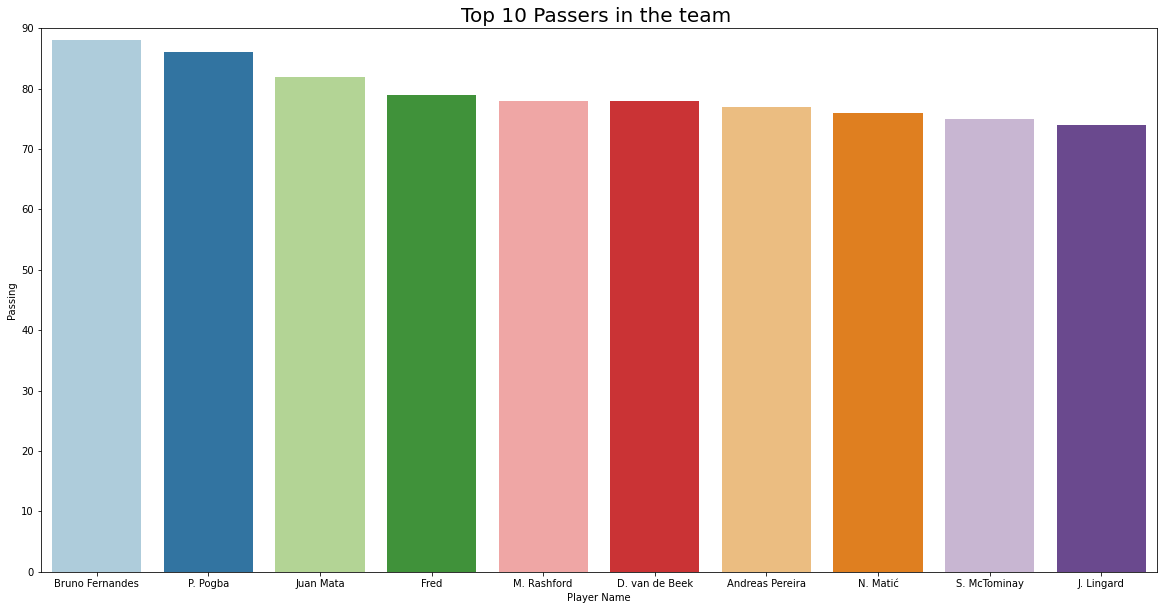

In [40]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Passers in the team ",fontsize=20)
sns.barplot(data=best_pass,x="short_name",y='passing',palette="Paired")
plt.ylim(0,90)
plt.ylabel("Passing")
plt.xlabel("Player Name")
plt.show()

## Best Shooting Skills

In [41]:
best_shoot=man_utd[['short_name','shooting']]

In [42]:
best_shoot.sort_values(by=['shooting'],ascending=False)

,short_name,shooting
30,Bruno Fernandes,83.000000
65,M. Rashford,83.000000
106,A. Martial,83.000000
49,P. Pogba,81.000000
153,D. van de Beek,80.000000
1058,O. Ighalo,78.000000
900,M. Greenwood,78.000000
1136,J. Lingard,74.000000
1662,Andreas Pereira,72.000000
610,Juan Mata,72.000000


In [43]:
best_shoot=best_shoot.head(10)

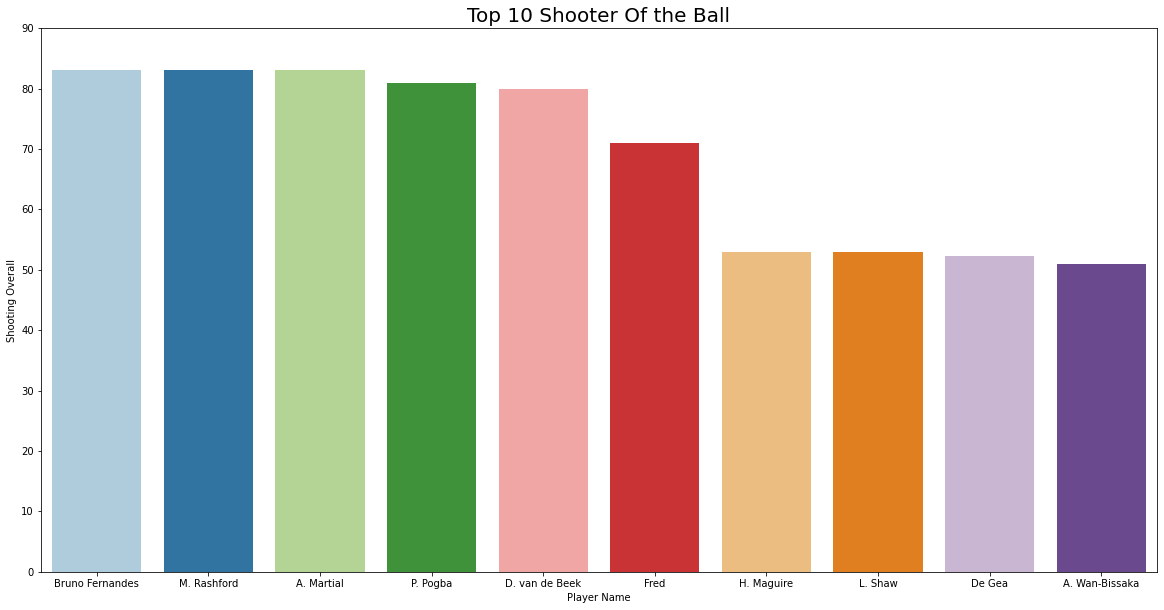

In [44]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Shooter Of the Ball",fontsize=20)
sns.barplot(data=best_shoot.sort_values(by=['shooting'],ascending=False),x="short_name",y="shooting",palette="Paired")
plt.ylim(0,90)
plt.ylabel("Shooting Overall")
plt.xlabel("Player Name")
plt.show()

  ## Best Dribbling Skill

In [45]:
best_drib=man_utd[['short_name','dribbling']]

In [46]:
best_drib=best_drib.sort_values(by=['dribbling'],ascending=False).head(10)

In [47]:
best_drib

,short_name,dribbling
106,A. Martial,87.0
65,M. Rashford,86.0
30,Bruno Fernandes,85.0
49,P. Pogba,85.0
308,Fred,83.0
610,Juan Mata,82.0
149,A. Wan-Bissaka,80.0
153,D. van de Beek,78.0
900,M. Greenwood,78.0
307,L. Shaw,78.0


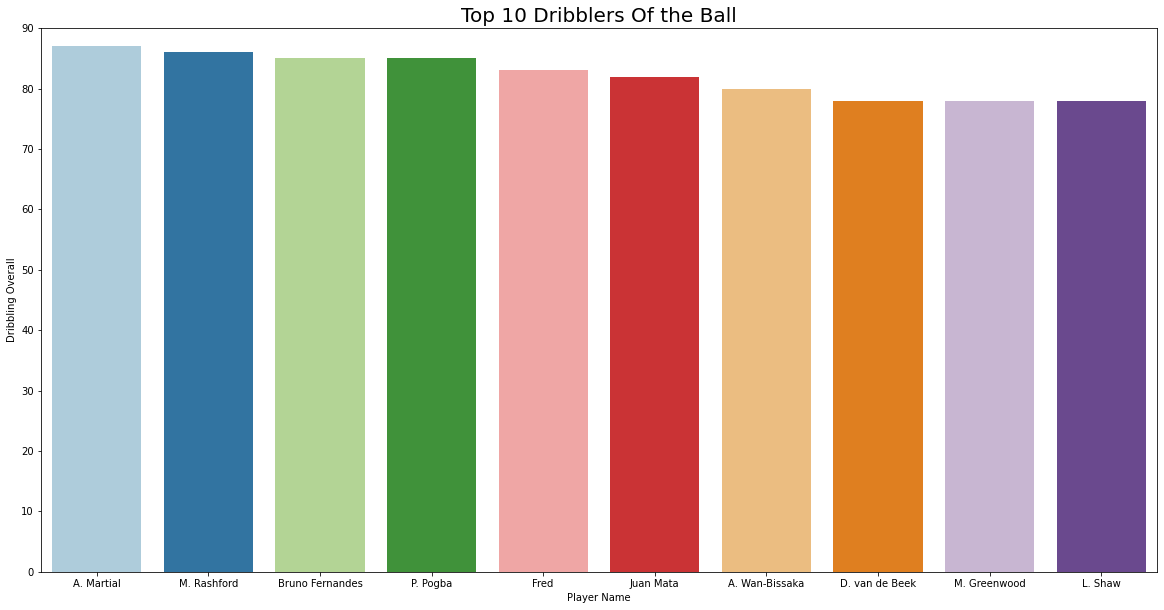

In [48]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Dribblers Of the Ball",fontsize=20)
sns.barplot(data=best_drib,x="short_name",y="dribbling",palette="Paired")
plt.ylim(0,90)
plt.ylabel("Dribbling Overall")
plt.xlabel("Player Name")
plt.show()

## Best Defending Skills

In [49]:
best_def=man_utd[['short_name','defending']]

In [50]:
best_def=best_def.sort_values(by=['defending'],ascending=False).head(10)

In [51]:
best_def

,short_name,defending
149,A. Wan-Bissaka,82.0
222,H. Maguire,82.0
632,C. Smalling,81.0
395,V. Lindelöf,81.0
466,N. Matić,80.0
307,L. Shaw,80.0
560,E. Bailly,79.0
1909,P. Jones,76.0
536,S. McTominay,76.0
308,Fred,75.0


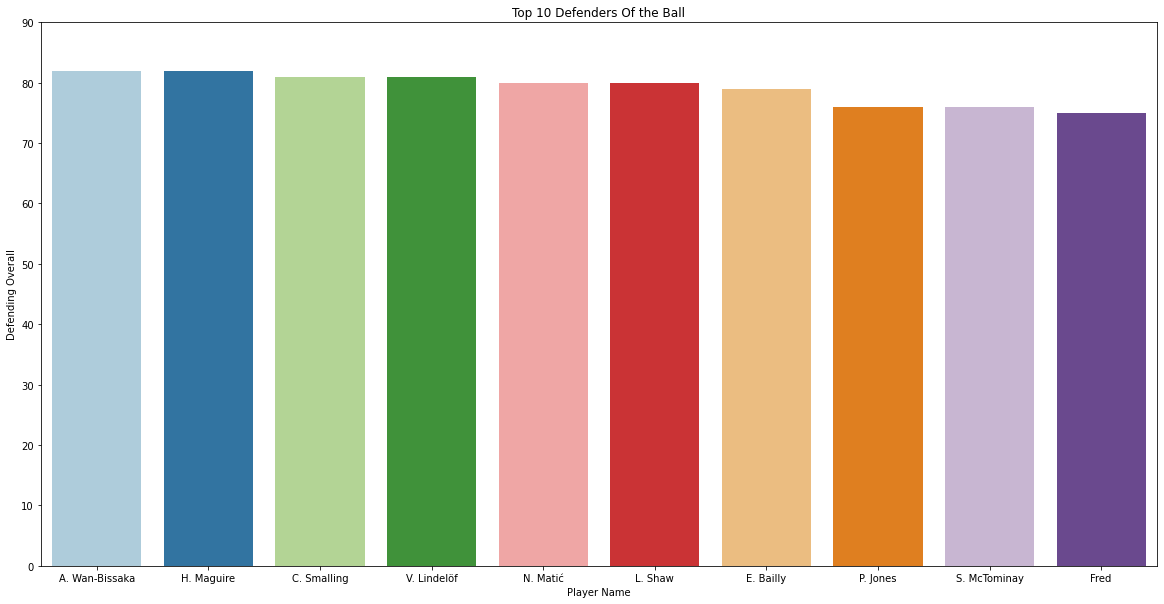

In [52]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Defenders Of the Ball")
sns.barplot(data=best_def,x="short_name",y="defending",palette="Paired")
plt.ylim(0,90)
plt.ylabel("Defending Overall")
plt.xlabel("Player Name")
plt.show()

## Best Pace Skill

In [53]:
best_pace=man_utd[['short_name','pace']]

In [54]:
best_pace=best_pace.sort_values(by=['pace'],ascending=False).head(10)

In [55]:
best_pace

,short_name,pace
933,D. James,95.0
65,M. Rashford,91.0
106,A. Martial,89.0
149,A. Wan-Bissaka,86.0
2530,T. Fosu-Mensah,81.0
900,M. Greenwood,81.0
1521,B. Williams,81.0
1185,Diogo Dalot,79.0
308,Fred,79.0
307,L. Shaw,78.0


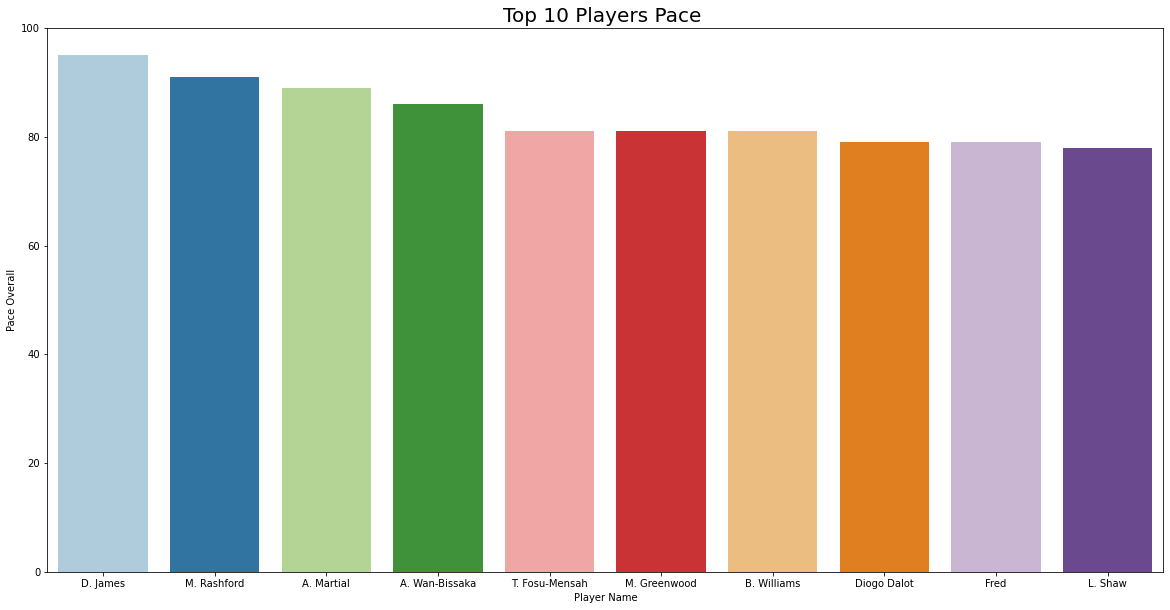

In [56]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Players Pace ",fontsize=20)
sns.barplot(data=best_pace,x="short_name",y="pace",palette="Paired")
plt.ylim(0,100)
plt.ylabel("Pace Overall")
plt.xlabel("Player Name")
plt.show()

## Best Physic Skill

In [57]:
best_phy=man_utd[['short_name','physic']]

In [58]:
best_phy=best_phy.sort_values(by=['physic'],ascending=False).head(10)

In [59]:
best_phy

,short_name,physic
222,H. Maguire,85.0
49,P. Pogba,85.0
536,S. McTominay,84.0
632,C. Smalling,81.0
153,D. van de Beek,80.0
560,E. Bailly,79.0
65,M. Rashford,78.0
1058,O. Ighalo,78.0
307,L. Shaw,78.0
466,N. Matić,77.0


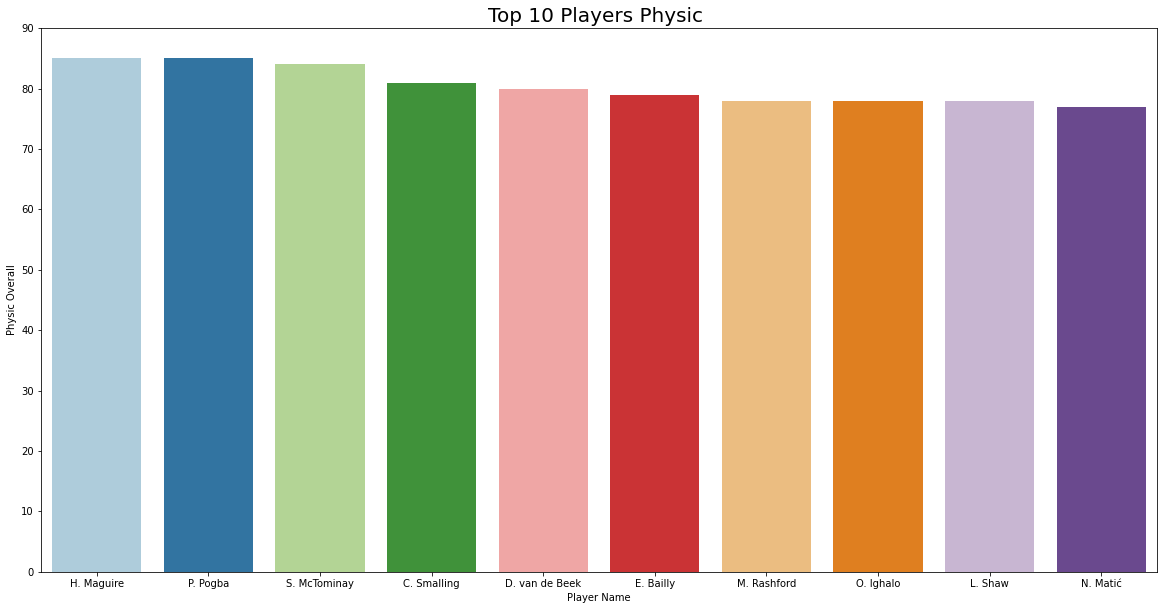

In [60]:
plt.figure(figsize=(20,10))
plt.title("Top 10 Players Physic ",fontsize=20)
sns.barplot(data=best_phy,x="short_name",y="physic",palette="Paired")
plt.ylim(0,90)
plt.ylabel("Physic Overall")
plt.xlabel("Player Name")
plt.show()

## Number of Player with same Nationality

In [61]:
sam_nat=man_utd[['short_name','nationality']]

In [62]:
sam_nat.head()

,short_name,nationality
30,Bruno Fernandes,Portugal
49,P. Pogba,France
59,De Gea,Spain
65,M. Rashford,England
106,A. Martial,France


In [63]:
sam_nat1=sam_nat1.sort_values(ascending=False)
sam_nat1=sam_nat.nationality.value_counts()
sam_nat1.head()

NameError: name 'sam_nat1' is not defined

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Number of Man Utd Player with Same Nationality",fontsize=20)
plt.bar(sam_nat1.keys()[0:5],sam_nat1[0:5],color=['#DC143C','#00BFFF','#D2691E','green','#191970'])
plt.ylabel("Number of players")
plt.xlabel("Nationality")

## Manchester United Player Comparison

In [64]:
col=['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [65]:
bruno=man_utd.loc[man_utd['short_name']=='Bruno Fernandes']
bruno=pd.DataFrame(bruno,columns=col)
marcus=man_utd.loc[man_utd['short_name']=='M. Rashford']
marcus=pd.DataFrame(marcus,columns=col)
pogba=man_utd.loc[man_utd['short_name']=='P. Pogba']
pogba=pd.DataFrame(pogba,columns=col)

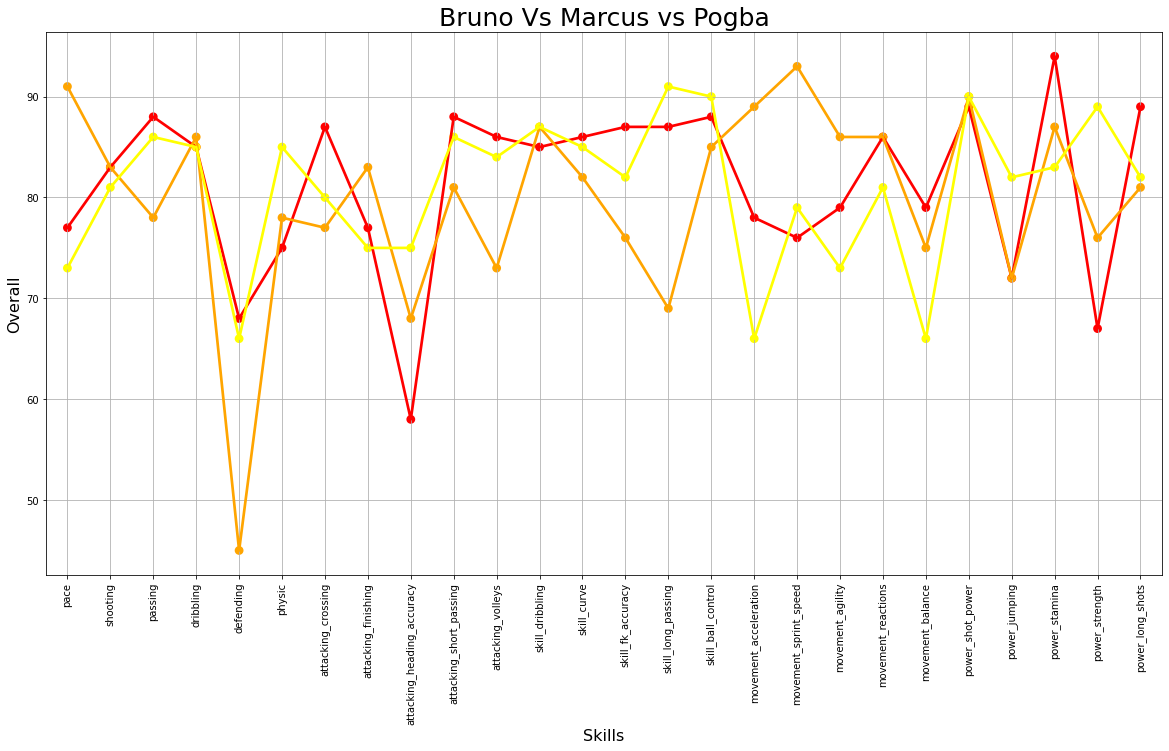

In [66]:
plt.figure(figsize=(20,10))
plt.title("Bruno Vs Marcus vs Pogba",fontsize=25)
sns.pointplot(data=bruno,color='red',alpha=0.6)
sns.pointplot(data=marcus,color='orange',alpha=0.6)
sns.pointplot(data=pogba,color='yellow',alpha=0.6)
plt.xticks(rotation=90)
plt.ylabel("Overall",fontsize=16)
plt.xlabel("Skills",fontsize=16)
plt.grid()
plt.show()

## Player Count According to the Height

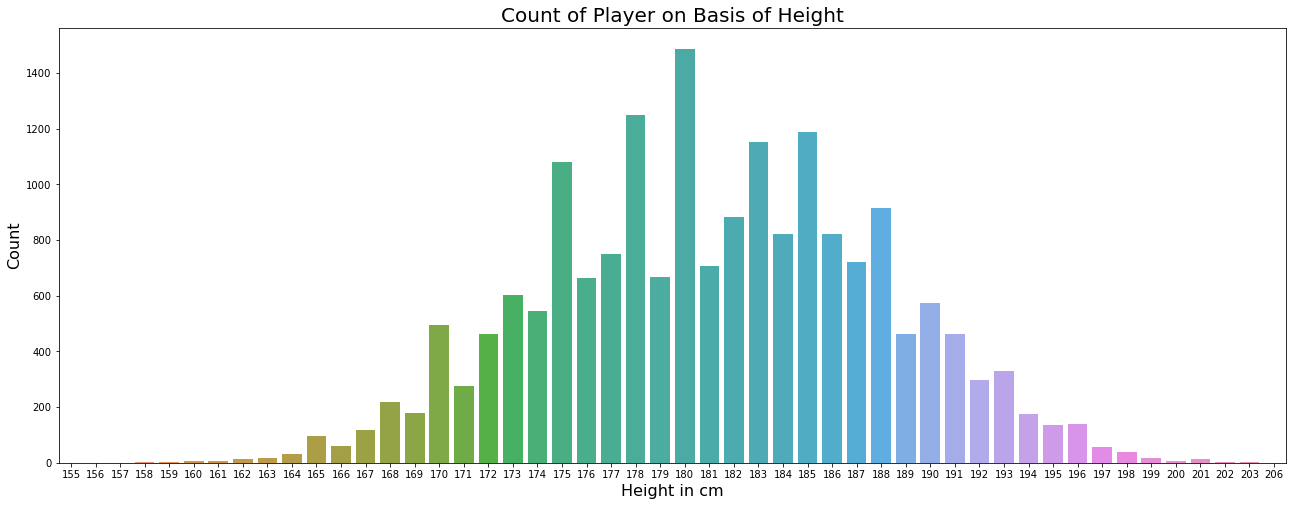

In [86]:
plt.figure(figsize=(22,8))
plt.title("Count of Player on Basis of Height",fontsize=20)
sns.countplot(x='height_cm',data=df)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Height in cm",fontsize=16)
plt.show()

## Height Vs Dribbling

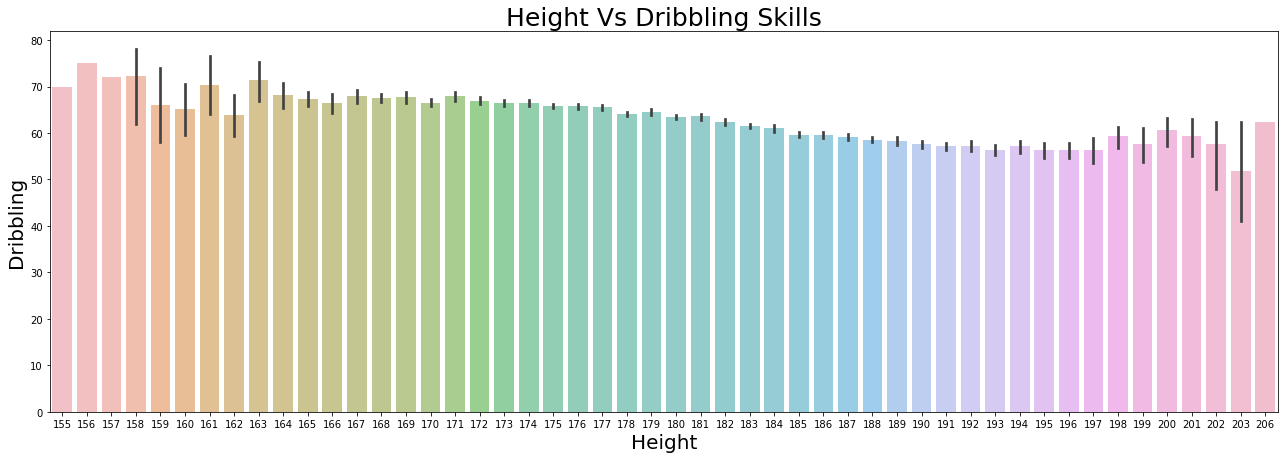

In [68]:
plt.figure(figsize=(22,7))
plt.title("Height Vs Dribbling Skills",fontsize=25)
sns.barplot(x="height_cm",y="dribbling",data=df.sort_values('height_cm',inplace=False),alpha=0.6)
plt.ylabel("Dribbling",fontsize=20)
plt.xlabel("Height",fontsize=20)
plt.show()

## Weight vs Dribbling

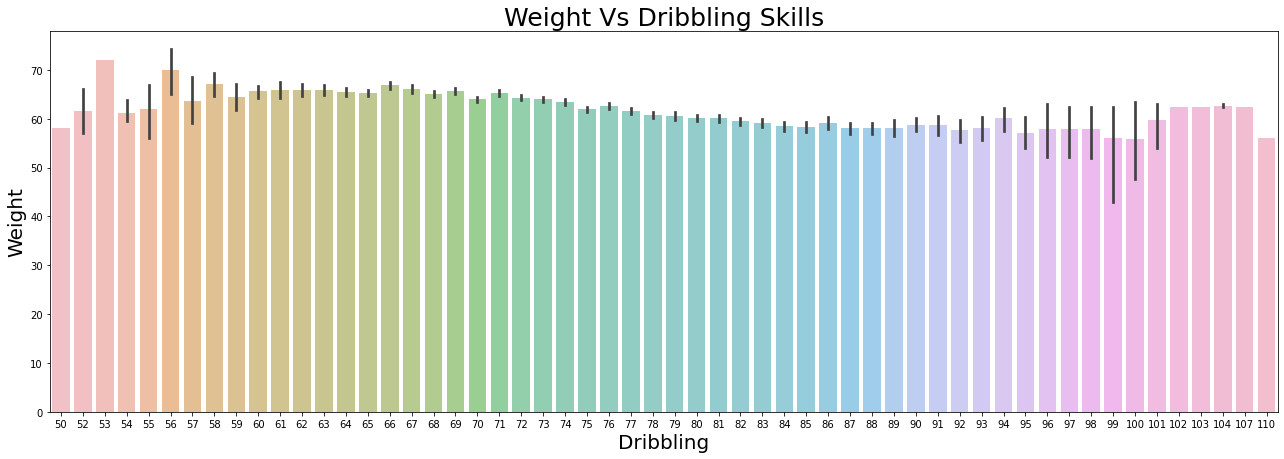

In [69]:
plt.figure(figsize=(22,7))
plt.title("Weight Vs Dribbling Skills",fontsize=25)
sns.barplot(x="weight_kg",y="dribbling",data=df.sort_values('weight_kg',inplace=False),alpha=0.6)
plt.xlabel("Dribbling",fontsize=20)
plt.ylabel("Weight",fontsize=20)
plt.show()

## Work Rate

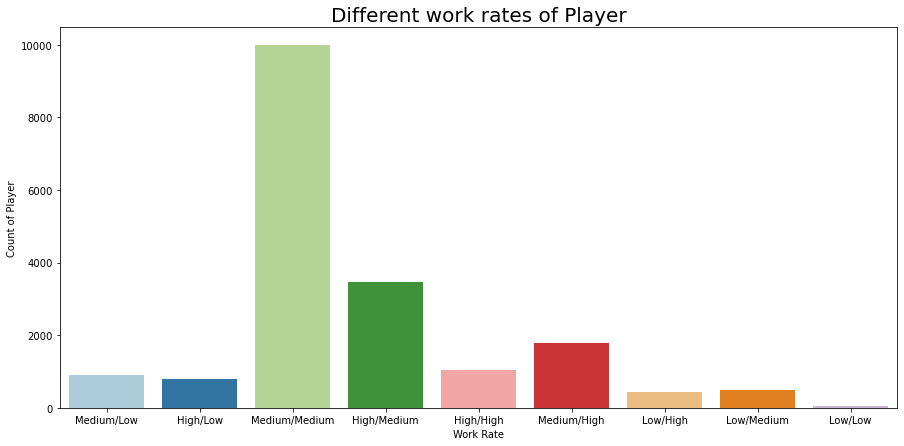

In [70]:
plt.figure(figsize=(15,7))
sns.countplot(x="work_rate",data=df,palette='Paired')
plt.title("Different work rates of Player",fontsize=20)
plt.xlabel("Work Rate")
plt.ylabel("Count of Player")
plt.show()

## Comparing 3 World Class  Players  

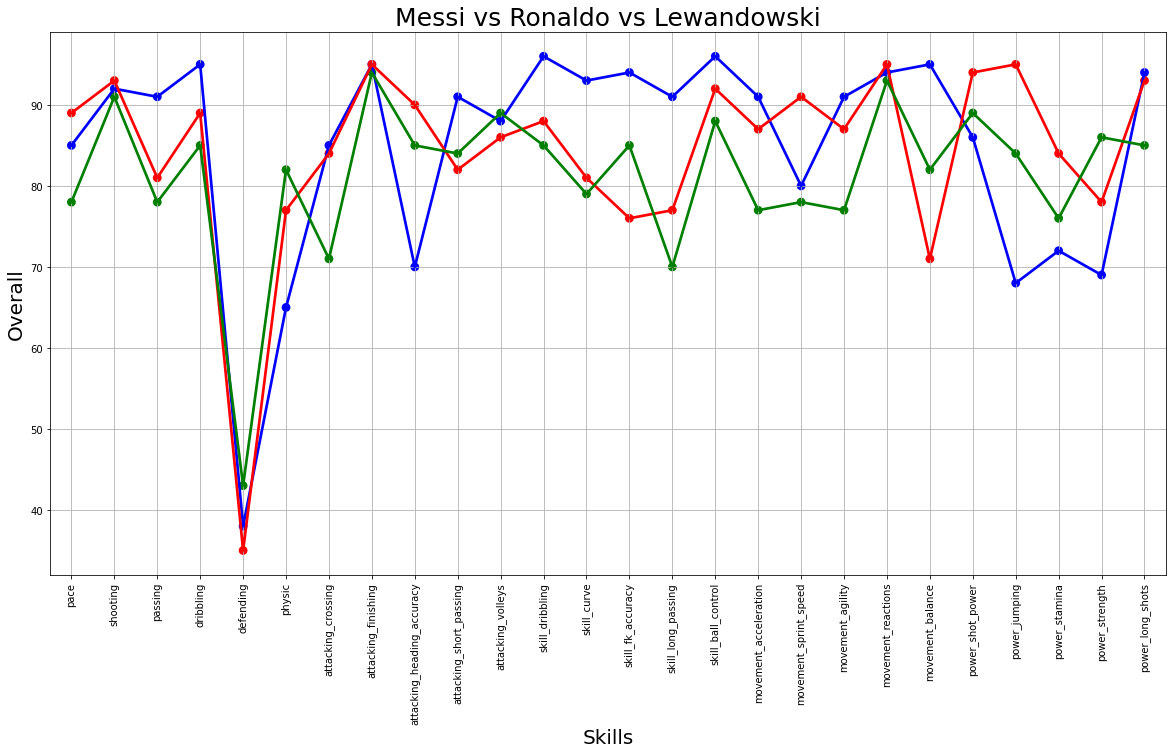

In [71]:
messi=df.loc[df['short_name']=='L. Messi']
messi=pd.DataFrame(messi,columns=col)
ronaldo=df.loc[df['short_name']=='Cristiano Ronaldo']
ronaldo=pd.DataFrame(ronaldo,columns=col)
lewandowski=df.loc[df['short_name']=='R. Lewandowski']
lewandowski=pd.DataFrame(lewandowski,columns=col)
plt.figure(figsize=(20,10))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)
sns.pointplot(data=lewandowski, color='green', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel("Skills",fontsize=20)
plt.ylabel("Overall",fontsize=20)
plt.title("Messi vs Ronaldo vs Lewandowski",fontsize=25)
plt.grid()

## Top 10 Player In the World and there Nationality

In [72]:
best_play=df[['short_name','overall','nationality']]

In [73]:
best_play=best_play.sort_values(by=['overall'],ascending=False).head(10)

In [74]:
best_play

,short_name,overall,nationality
0,L. Messi,93,Argentina
1,Cristiano Ronaldo,92,Portugal
2,J. Oblak,91,Slovenia
3,R. Lewandowski,91,Poland
4,Neymar Jr,91,Brazil
5,K. De Bruyne,91,Belgium
9,Alisson,90,Brazil
10,S. Mané,90,Senegal
11,M. Salah,90,Egypt
8,V. van Dijk,90,Netherlands


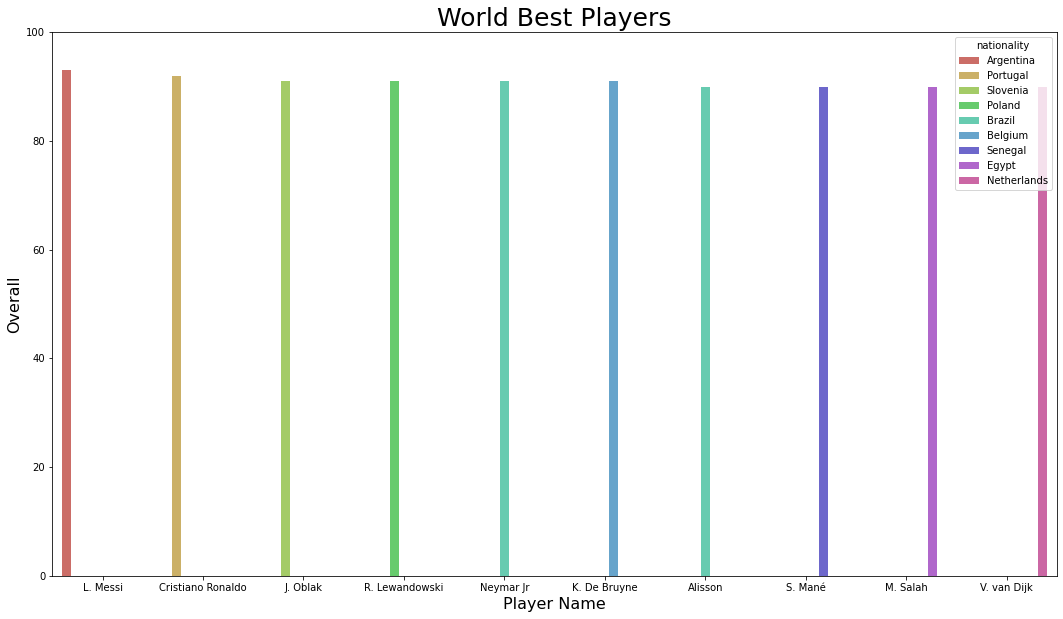

In [75]:
plt.figure(figsize=(18,10))
plt.title("World Best Players",fontsize=25)
sns.barplot(data=best_play,x="short_name",y="overall",hue='nationality',palette='hls')
plt.ylabel("Overall",fontsize=16)
plt.xlabel("Player Name",fontsize=16)
plt.ylim(0,100)
plt.show()

## Best Player According to there Skills

In [76]:
pr_cols=['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
        'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']
i=0

while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][2]))
    i += 1

Best pace : K. Mbappé
Best shooting : Cristiano Ronaldo
Best passing : K. De Bruyne
Best dribbling : L. Messi
Best defending : V. van Dijk
Best physic : Casemiro
Best attacking_crossing : K. De Bruyne
Best attacking_finishing : L. Messi
Best attacking_heading_accuracy : L. de Jong
Best attacking_short_passing : K. De Bruyne
Best attacking_volleys : L. Suárez
Best skill_dribbling : L. Messi
Best skill_curve : Quaresma
Best skill_fk_accuracy : L. Messi
Best skill_long_passing : K. De Bruyne
Best skill_ball_control : L. Messi
Best movement_acceleration : Adama Traoré
Best movement_sprint_speed : K. Mbappé
Best movement_agility : Neymar Jr
Best movement_reactions : Cristiano Ronaldo
Best movement_balance : E. Oztumer
Best power_shot_power : A. Kolarov
Best power_jumping : Cristiano Ronaldo
Best power_stamina : V. Darida
Best power_strength : A. Akinfenwa
Best power_long_shots : L. Messi


## Age Disitribution in Clubs

In [77]:
top_clubs=('Manchester United','Manchester City','FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','FC Bayern München','Atlético Madrid','Liverpool','Arsenal')

In [78]:
club=df.loc[df['club_name'].isin(top_clubs) & df['age']]

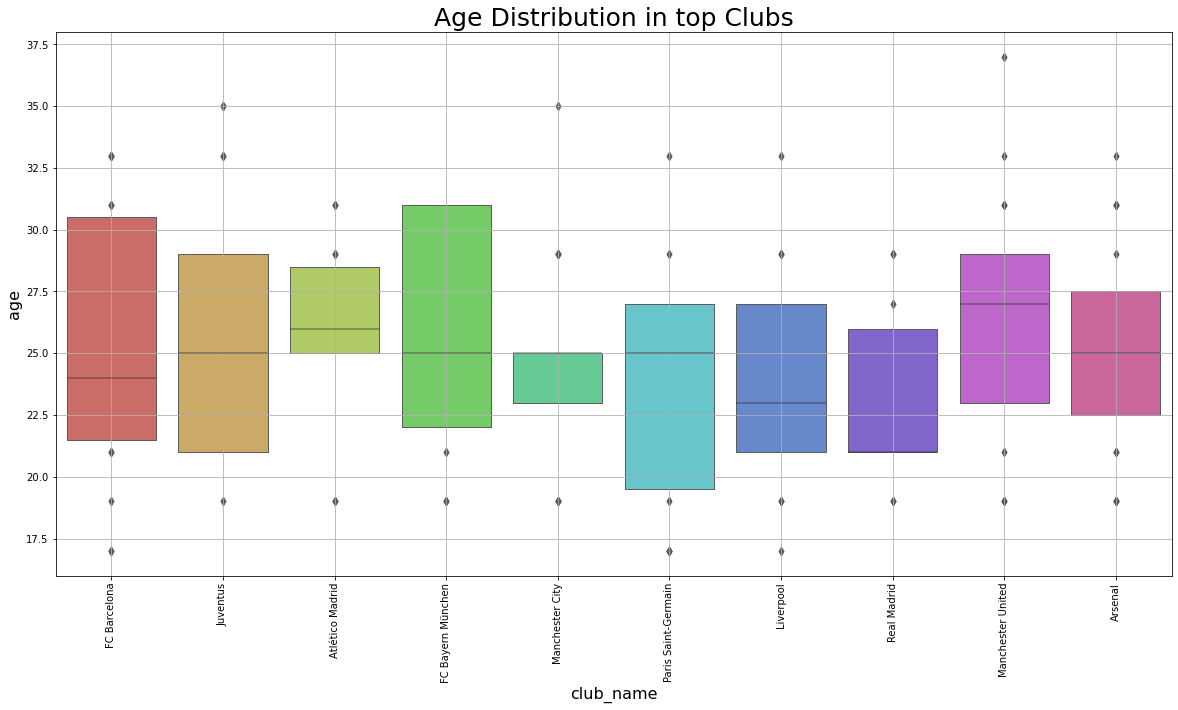

In [79]:
plt.figure(figsize=(20,10))
plt.title("Age Distribution in top Clubs",fontsize=25)
plt.xlabel("Club Name",fontsize=16)
plt.ylabel("Age Distribution",fontsize=16)
plt.xticks(rotation=90)
sns.boxenplot(data=club,x="club_name",y="age",palette="hls")
plt.grid()
plt.show()

## Clubs Overall

In [80]:
top_clubs=('Manchester United','Manchester City','FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','FC Bayern München','Atlético Madrid','Liverpool','Arsenal')

In [81]:
club_ovr=df.loc[df['club_name'].isin(top_clubs) & df['overall']]

In [82]:
club_ovr.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.00000,92.000000,91.000000,95.00000,38.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,67.66811,52.274954,57.139434,62.45543,51.316292,64.458988,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.00000,91.000000,78.000000,85.00000,43.000000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.00000,85.000000,86.000000,94.00000,36.000000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62

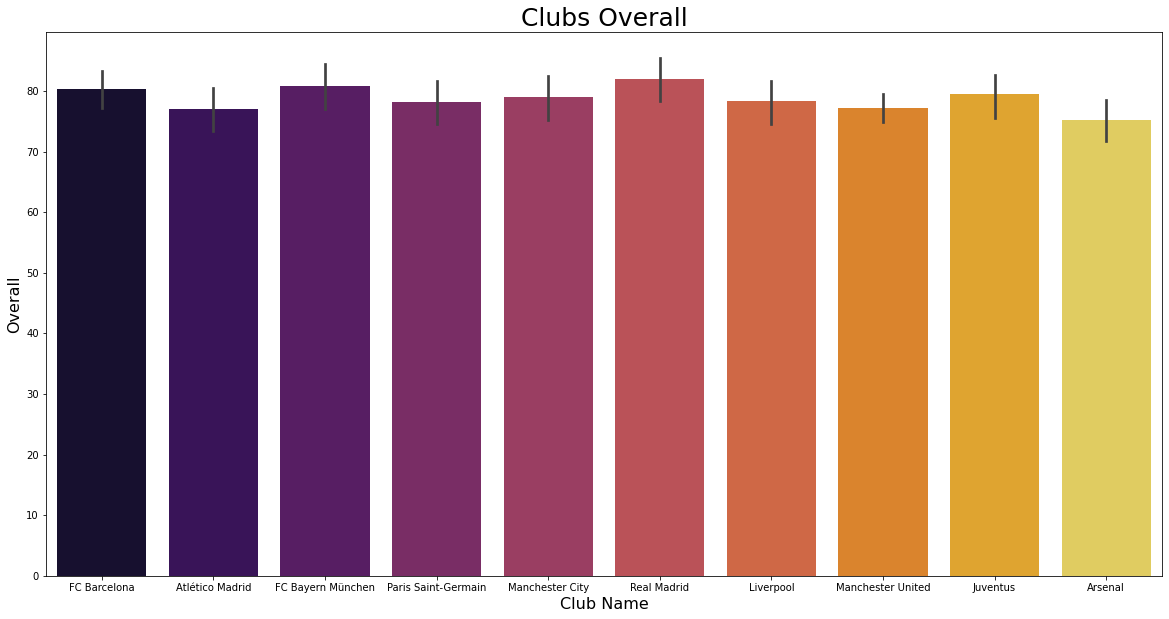

In [83]:
plt.figure(figsize=(20,10))
plt.title("Clubs Overall",fontsize=25)
sns.barplot(data=club_ovr,x=club_ovr["club_name"],y=club_ovr["overall"],palette='inferno')
plt.xlabel("Club Name",fontsize=16)
plt.ylabel("Overall",fontsize=16)
plt.show()

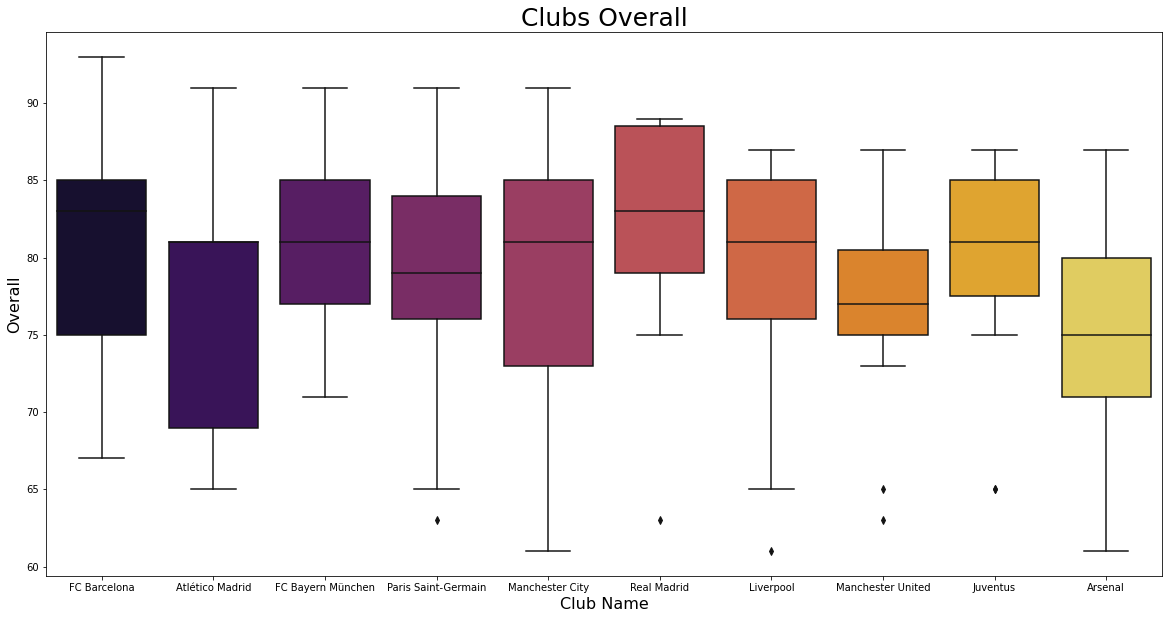

In [84]:
plt.figure(figsize=(20,10))
plt.title("Clubs Overall",fontsize=25)
sns.boxplot(data=club_ovr,x=club_ovr["club_name"],y=club_ovr["overall"],palette='inferno')
plt.xlabel("Club Name",fontsize=16)
plt.ylabel("Overall",fontsize=16)
plt.show()